In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

import re

In [2]:
pop_df = pd.read_csv('./data/pop_2021_estimates.csv', skiprows = 3, usecols = ['Unnamed: 1', '2020', '2021'])
team_df = pd.read_csv('./data/salary2021.csv')
team_cities = pd.read_csv('./data/team_cities.csv')

In [3]:
team_cities.columns = ['Rank', 'TeamName', 'Geography']

team_cities['City'] = team_cities.Geography.apply(lambda x: x.split(',')[0].strip())
team_cities['State'] = team_cities.Geography.apply(lambda x: x.split(',')[1].strip())

team_cities.head()

,Rank,TeamName,Geography,City,State
0,1,Baltimore Orioles,"Baltimore, Maryland",Baltimore,Maryland
1,2,Boston Red Sox,"Boston, Massachusetts",Boston,Massachusetts
2,3,New York Yankees,"New York City, New York",New York City,New York
3,4,Tampa Bay Rays,"St. Petersburg, Florida",St. Petersburg,Florida
4,5,Toronto Blue Jays,"Toronto, Ontario",Toronto,Ontario


In [4]:
pop_df.columns = ['CityState', '2020', '2021']
pop_df['CityState'] = pop_df['CityState'].astype('str')

pop_df['City'] = pop_df['CityState'].apply(lambda x: 'New York City' if x == 'New York city, New York' 
                                           else x.replace('city', '').split(',')[0].strip())
pop_df['State'] = pop_df['CityState'].apply(lambda x: x.split(',')[-1].strip())

# special case
pop_df.loc[pop_df.State == 'District of Columbia', 'State'] = 'D.C.'

pop_df.head()

,CityState,2020,2021,City,State
0,"New York city, New York","8,772,978","8,467,513",New York City,New York
1,"Los Angeles city, California","3,889,834","3,849,297",Los Angeles,California
2,"Chicago city, Illinois","2,741,730","2,696,555",Chicago,Illinois
3,"Houston city, Texas","2,300,027","2,288,250",Houston,Texas
4,"Phoenix city, Arizona","1,611,345","1,624,569",Phoenix,Arizona


In [5]:
temp_df = pd.merge(team_cities, pop_df, on = ['City', 'State'], how = 'left')

# special case 
temp_df.loc[temp_df.City == 'Toronto', '2021'] = '6,202,225'

temp_df.head()

,Rank,TeamName,Geography,City,State,CityState,2020,2021
0,1,Baltimore Orioles,"Baltimore, Maryland",Baltimore,Maryland,"Baltimore city, Maryland","583,132","576,498"
1,2,Boston Red Sox,"Boston, Massachusetts",Boston,Massachusetts,"Boston city, Massachusetts","674,272","654,776"
2,3,New York Yankees,"New York City, New York",New York City,New York,"New York city, New York","8,772,978","8,467,513"
3,4,Tampa Bay Rays,"St. Petersburg, Florida",St. Petersburg,Florida,"St. Petersburg city, Florida","258,658","258,201"
4,5,Toronto Blue Jays,"Toronto, Ontario",Toronto,Ontario,NaN,NaN,"6,202,225"


In [6]:
team_df.head()

,Rank,Team,Win%,Roster,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll
0,1.0,\n\nLos Angeles Dodgers\nLAD\n\n\n\n\n,0.654,28,"$174,661,542","$38,501,103","$6,150,521","$24,070,000",0-,"$266,020,809"
1,2.0,\n\nNew York Yankees\nNYY\n\n\n\n\n,0.568,30,"$141,518,753","$48,217,362","$12,129,712","$13,040,875",0-,"$205,669,863"
2,3.0,\n\nNew York Mets\nNYM\n\n\n\n,0.475,29,"$176,565,754","$11,933,570","$9,524,946","$12,006,000",0-,"$201,189,189"
3,4.0,\n\nPhiladelphia Phillies\nPHI\n\n\n\n,0.506,27,"$147,764,046","$19,936,225","$13,803,916","$10,533,500",0-,"$197,263,223"
4,5.0,\n\nHouston Astros\nHOU\n\n\n\n\n,0.586,28,"$147,127,725","$39,870,546","$4,134,205","$7,547,600",0-,"$194,472,041"


In [7]:
team_df['Team'] = team_df['Team'].apply(lambda x: x.replace('\n', ' ').strip())
team_df.Team = team_df.Team.apply(lambda x: re.split(r'[A-Z]{2,3}', x)[0].strip())
team_df.head()

,Rank,Team,Win%,Roster,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll
0,1.0,Los Angeles Dodgers,0.654,28,"$174,661,542","$38,501,103","$6,150,521","$24,070,000",0-,"$266,020,809"
1,2.0,New York Yankees,0.568,30,"$141,518,753","$48,217,362","$12,129,712","$13,040,875",0-,"$205,669,863"
2,3.0,New York Mets,0.475,29,"$176,565,754","$11,933,570","$9,524,946","$12,006,000",0-,"$201,189,189"
3,4.0,Philadelphia Phillies,0.506,27,"$147,764,046","$19,936,225","$13,803,916","$10,533,500",0-,"$197,263,223"
4,5.0,Houston Astros,0.586,28,"$147,127,725","$39,870,546","$4,134,205","$7,547,600",0-,"$194,472,041"


In [8]:
df = pd.merge(team_df, temp_df, left_on = 'Team', right_on = 'TeamName', how = 'left')
df.head(2)

,Rank_x,Team,Win%,Roster,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,Rank_y,TeamName,Geography,City,State,CityState,2020,2021
0,1.0,Los Angeles Dodgers,0.654,28,"$174,661,542","$38,501,103","$6,150,521","$24,070,000",0-,"$266,020,809",28.0,Los Angeles Dodgers,"Los Angeles, California",Los Angeles,California,"Los Angeles city, California","3,889,834","3,849,297"
1,2.0,New York Yankees,0.568,30,"$141,518,753","$48,217,362","$12,129,712","$13,040,875",0-,"$205,669,863",3.0,New York Yankees,"New York City, New York",New York City,New York,"New York city, New York","8,772,978","8,467,513"


In [9]:
final_df = df[['Team', 'Win%', '26-Man Payroll', 'Injured Reserve' , 'Retained', 'Buried', 
                    'Suspended', '2021 Total Payroll', '2021']]

final_df.loc[final_df.Team == 'League Average', '2021'] = 0
final_df.head()

,Team,Win%,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,2021
0,Los Angeles Dodgers,0.654,"$174,661,542","$38,501,103","$6,150,521","$24,070,000",0-,"$266,020,809","3,849,297"
1,New York Yankees,0.568,"$141,518,753","$48,217,362","$12,129,712","$13,040,875",0-,"$205,669,863","8,467,513"
2,New York Mets,0.475,"$176,565,754","$11,933,570","$9,524,946","$12,006,000",0-,"$201,189,189","8,467,513"
3,Philadelphia Phillies,0.506,"$147,764,046","$19,936,225","$13,803,916","$10,533,500",0-,"$197,263,223","1,576,251"
4,Houston Astros,0.586,"$147,127,725","$39,870,546","$4,134,205","$7,547,600",0-,"$194,472,041","2,288,250"


In [10]:
new_df = pd.DataFrame(columns = final_df.columns)
string_cols = ['26-Man Payroll', 'Injured Reserve' , 'Retained', 'Buried', 
                    'Suspended', '2021 Total Payroll', '2021']

for col in final_df.columns:
    if col in string_cols:
        new_df[col] = final_df[col].str.replace('$', '', regex=False).str.replace(',', '').str.replace('-', '')
    else:
        new_df[col] = final_df[col]

new_df.loc[new_df.Team == 'League Average', '2021'] = 0        

for col in string_cols:
    new_df[col] = new_df[col].astype(np.int64)
    
new_df['Wins'] = np.round(new_df['Win%'] * 162)
df = new_df.copy()
df.head()

,Team,Win%,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,2021,Wins
0,Los Angeles Dodgers,0.654,174661542,38501103,6150521,24070000,0,266020809,3849297,106.0
1,New York Yankees,0.568,141518753,48217362,12129712,13040875,0,205669863,8467513,92.0
2,New York Mets,0.475,176565754,11933570,9524946,12006000,0,201189189,8467513,77.0
3,Philadelphia Phillies,0.506,147764046,19936225,13803916,10533500,0,197263223,1576251,82.0
4,Houston Astros,0.586,147127725,39870546,4134205,7547600,0,194472041,2288250,95.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                31 non-null     object 
 1   Win%                31 non-null     float64
 2   26-Man Payroll      31 non-null     int64  
 3   Injured Reserve     31 non-null     int64  
 4   Retained            31 non-null     int64  
 5   Buried              31 non-null     int64  
 6   Suspended           31 non-null     int64  
 7   2021 Total Payroll  31 non-null     int64  
 8   2021                31 non-null     int64  
 9   Wins                31 non-null     float64
dtypes: float64(2), int64(7), object(1)
memory usage: 2.7+ KB


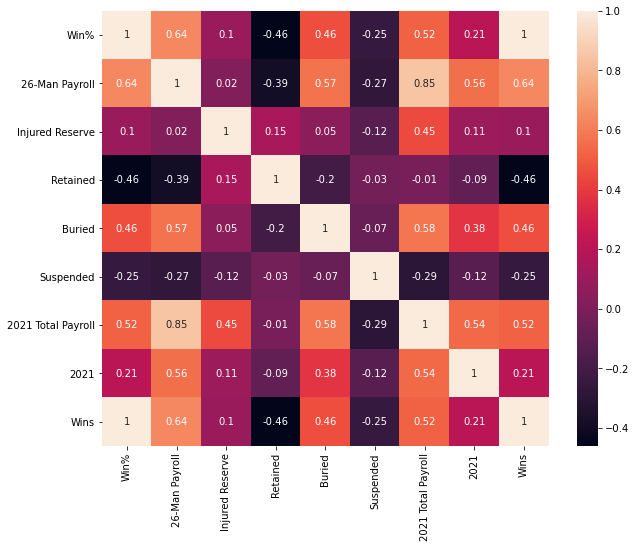

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

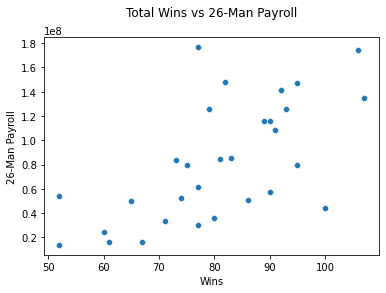

In [13]:
plt.figure()

figure = sns.scatterplot(x = df['Wins'], y = df['26-Man Payroll'])

plt.title('Total Wins vs 26-Man Payroll\n')
plt.show()

In [14]:
df['above_avg_pay'] = df['26-Man Payroll'] > df.loc[df.Team == 'League Average', '26-Man Payroll'].iloc[0]
df.head()

,Team,Win%,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,2021,Wins,above_avg_pay
0,Los Angeles Dodgers,0.654,174661542,38501103,6150521,24070000,0,266020809,3849297,106.0,True
1,New York Yankees,0.568,141518753,48217362,12129712,13040875,0,205669863,8467513,92.0,True
2,New York Mets,0.475,176565754,11933570,9524946,12006000,0,201189189,8467513,77.0,True
3,Philadelphia Phillies,0.506,147764046,19936225,13803916,10533500,0,197263223,1576251,82.0,True
4,Houston Astros,0.586,147127725,39870546,4134205,7547600,0,194472041,2288250,95.0,True


In [15]:
df_above = df[df['above_avg_pay'] == True]
df_above.head()

,Team,Win%,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,2021,Wins,above_avg_pay
0,Los Angeles Dodgers,0.654,174661542,38501103,6150521,24070000,0,266020809,3849297,106.0,True
1,New York Yankees,0.568,141518753,48217362,12129712,13040875,0,205669863,8467513,92.0,True
2,New York Mets,0.475,176565754,11933570,9524946,12006000,0,201189189,8467513,77.0,True
3,Philadelphia Phillies,0.506,147764046,19936225,13803916,10533500,0,197263223,1576251,82.0,True
4,Houston Astros,0.586,147127725,39870546,4134205,7547600,0,194472041,2288250,95.0,True


In [16]:
df_below = df[df['above_avg_pay'] == False]
df_below.head()

,Team,Win%,26-Man Payroll,Injured Reserve,Retained,Buried,Suspended,2021 Total Payroll,2021,Wins,above_avg_pay
6,Los Angeles Angels,0.475,30467086,100777679,46663119,8254500,0,180349558,345940,77.0,False
12,Chicago Cubs,0.438,33910889,38534396,71494409,1717500,0,144607670,2696555,71.0,False
13,Washington Nationals,0.401,50076145,34877122,57061332,6925200,0,144415187,670050,65.0,False
16,Minnesota Twins,0.451,83609495,13198044,19934219,9234500,0,120084606,425336,73.0,False
17,Colorado Rockies,0.460,79895422,5931272,19571956,7398500,0,116408966,711463,75.0,False


In [17]:
above_pay_wins = np.mean(df_above.Wins)
below_pay_wins = np.mean(df_below.Wins)
print(above_pay_wins, below_pay_wins)

actual_diff = above_pay_wins - below_pay_wins
print(actual_diff)

90.46153846153847 74.22222222222223
16.23931623931624


In [18]:
def perm_fun(df):
    idx_a = df.sample(len(df_above)).index
    idx_b = df.sample(len(df_below)).index
    
    idx_a_avg = np.mean(df.loc[df.index.isin(idx_a), 'Wins'])
    idx_b_avg = np.mean(df.loc[df.index.isin(idx_b), 'Wins'])
    
    return idx_a_avg - idx_b_avg

In [19]:
diffs = []

for i in range(1000):
    diffs.append(perm_fun(df))

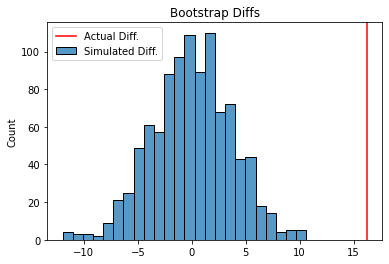

In [20]:
plt.figure()

sns.histplot(diffs, label = 'Simulated Diff.')
plt.title('Bootstrap Diffs')

plt.axvline(actual_diff, c='red', label = 'Actual Diff.')

plt.legend()
plt.show()

In [21]:
count = [i for i in diffs if i > actual_diff]
len(count) / len(diffs)

0.0

## Linear Regression

In [22]:
# the cost function for linear regression
def compute_cost(x, y, w, b):
    m = x.shape[0] # number of examples
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b # model
        error = (f_wb - y[i]) ** 2 # squared error
        total_cost += error
    
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [23]:
def compute_gradient(x, y, w, b):
    """
    args:
        x: ndarray (m,)): data
        y (ndarray (m,)): target values
        w,b (scalar) : model parameters
        
    returns
        dj_dw (scalar): the gradient of the cost w.r.t. the parameter w
        dj_db (scalar): the gradient of the cost w.r.t. the parameter b
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [24]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b.  Updates w,b by
    taking num_iters gradient steps with learning rate alpha
    
    args:
        x (ndarray (m,)): data, m examples
        y (ndarray (m,)): target values
        w_in, b_in (scalar): initial values of model parameters
        alpha (float): learning rate
        num_iters (int): number of iterations
        cost_function: function to call to produce cost
        gradient_function: function to call to produce gradient
        
    returns:
        w (scalar): updated value of parameter after running gradient descent
        b (scalar): updated value of parameter after running gradient descent
        J_history (list): history of cost values
        p_history (list): history of parameters [w,b]
    """
    print(num_iters)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # calculate gradient and update params using gradient function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # update params
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # save cost at each iteration
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])
            
        # print cost every 10 iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history

In [25]:
def normalize_1d_array(x):
    x_norm = normalize(x_train.reshape(-1, 1), axis = 0)
    x_norm = x_norm.reshape(x_norm.shape[0], )
    
    return x_norm

In [26]:
# initialize feature and target variables
x_train = np.array(df['26-Man Payroll'])
x_train_norm = normalize(x_train.reshape(-1, 1), axis = 0)
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0],)

y_train = np.array(df['Wins'])

# initialize parameters
w_init = 0
b_init = 0

# GD settings
iterations = 10000
tmp_alpha = 0.01

w_final, b_final, J_hist, p_hist = gradient_descent(x_train_norm, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

10000
Iteration    0: Cost 3.31e+03  dj_dw: -1.343e+01, dj_db: -8.103e+01   w:  1.343e-01, b: 8.10323e-01
Iteration 1000: Cost 8.40e+01  dj_dw: -6.381e-01, dj_db:  9.739e-02   w:  1.907e+01, b: 7.81583e+01
Iteration 2000: Cost 8.02e+01  dj_dw: -5.898e-01, dj_db:  9.261e-02   w:  2.521e+01, b: 7.71978e+01
Iteration 3000: Cost 7.69e+01  dj_dw: -5.456e-01, dj_db:  8.566e-02   w:  3.088e+01, b: 7.63069e+01
Iteration 4000: Cost 7.41e+01  dj_dw: -5.047e-01, dj_db:  7.924e-02   w:  3.613e+01, b: 7.54829e+01
Iteration 5000: Cost 7.16e+01  dj_dw: -4.668e-01, dj_db:  7.329e-02   w:  4.099e+01, b: 7.47206e+01
Iteration 6000: Cost 6.96e+01  dj_dw: -4.318e-01, dj_db:  6.779e-02   w:  4.548e+01, b: 7.40156e+01
Iteration 7000: Cost 6.78e+01  dj_dw: -3.994e-01, dj_db:  6.271e-02   w:  4.963e+01, b: 7.33635e+01
Iteration 8000: Cost 6.63e+01  dj_dw: -3.694e-01, dj_db:  5.800e-02   w:  5.347e+01, b: 7.27603e+01
Iteration 9000: Cost 6.50e+01  dj_dw: -3.417e-01, dj_db:  5.365e-02   w:  5.702e+01, b: 7.2202

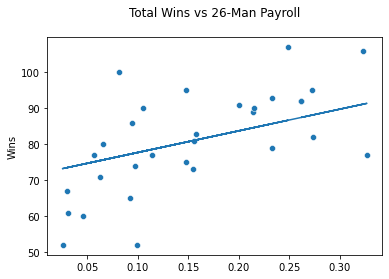

In [27]:
plt.figure()

figure = sns.scatterplot(x = x_train_norm, y = df['Wins'])

x_train_norm
f_wb = w_final * x_train_norm + b_final

plt.plot(x_train_norm, f_wb)

plt.title('Total Wins vs 26-Man Payroll\n')
plt.show()